<a href="https://colab.research.google.com/github/josedavidcortes-com/computerVision/blob/main/Assignment_03_Computer_Vision_CSC752_UT1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC, LinearSVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score
import numpy as np
import seaborn as sns
from sklearn import svm
%matplotlib inline

In [28]:
#load the iris datasets
from sklearn import datasets
dataset = datasets.load_iris()

In [29]:
#seprate the features and the target variable
features = dataset.data
target = dataset.target
print(dataset.target_names)

['setosa' 'versicolor' 'virginica']


In [30]:
#split the dataset into test set and train set in 20:80 ratio
X_train,X_test, y_train,y_test =train_test_split(features,target,test_size=0.2,shuffle=True)
print(X_train.shape)
print(X_test.shape)

(120, 4)
(30, 4)


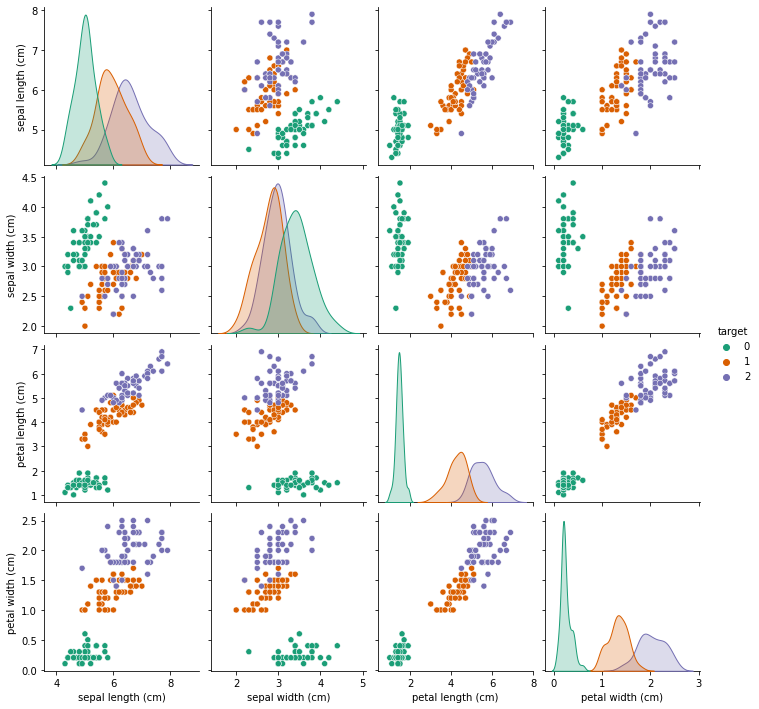

In [31]:
#visualize the datset
df = pd.DataFrame(data=dataset.data, columns=dataset.feature_names)
df["target"] = dataset.target
sns.pairplot(df, hue="target", palette='Dark2')

In [32]:
#Create instances of SVM to fit the data
C = 0.2 # SVM regularization parameter
svm_linear = svm.SVC(kernel='linear', C=C,gamma='auto').fit(X_train, y_train)
svm_poly = svm.SVC(kernel='poly',C=C,gamma='auto').fit(X_train,y_train)
svm_gaussian= svm.SVC(C = C, kernel="rbf").fit( X_train, y_train)

In [33]:
#confusion matrix the test data:
from sklearn.metrics import confusion_matrix
svm_linear_pred = svm_linear.predict(X_test)
svm_poly_pred = svm_poly.predict(X_test)
svm_gaussian_pred = svm_gaussian.predict(X_test)
print("Confusion matrix for linear kernel \n",confusion_matrix(svm_linear_pred,y_test))
print("Confusion matrix for polynomial kernel\n",confusion_matrix(svm_poly_pred,y_test))
print("Confusion matrix for gaussian kernel\n",confusion_matrix(svm_gaussian_pred,y_test))


Confusion matrix for linear kernel 
 [[10  0  0]
 [ 0  8  0]
 [ 0  0 12]]
Confusion matrix for polynomial kernel
 [[10  0  0]
 [ 0  7  1]
 [ 0  1 11]]
Confusion matrix for gaussian kernel
 [[10  0  0]
 [ 0  8  4]
 [ 0  0  8]]


In [34]:
#calculate the accuracy
print("Accuracy for the linear kernel ", accuracy_score(svm_linear_pred,y_test))
print("Analysus of linear kernel \n",classification_report(svm_linear_pred,y_test))
print("Accuracy for the polynomial kernel",accuracy_score(svm_poly_pred,y_test))
print("Analysus of polynomial kernel \n",classification_report(svm_poly_pred,y_test))
print("Accuracy for the gaussian kernel",accuracy_score(svm_gaussian_pred,y_test))
print("Analysus of gaussian kernel \n",classification_report(svm_gaussian_pred,y_test))

Accuracy for the linear kernel  1.0
Analysus of linear kernel 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         8
           2       1.00      1.00      1.00        12

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Accuracy for the polynomial kernel 0.9333333333333333
Analysus of polynomial kernel 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.88      0.88      0.88         8
           2       0.92      0.92      0.92        12

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30

Accuracy for the gaussian kernel 0.8666666666666667
Analysus of gaussian kernel 
       

Perhaps the size of the dataset is not enough, but in this case **the Linear Kernel performance in a better way** compared with Gaussian and Polynomial Kernel using SVM regularization parameter C=0.2